In [1]:
from MiniProject1 import Reader
from MiniProject1 import Sorter
from MiniProject1 import TimeoutException
import Trie
from datetime import datetime as dt
from collections import defaultdict
import time
import pandas as pd
from statistics import mean
from pprint import pprint as pp
from matplotlib import pyplot as plt

In [2]:
reader = Reader('shakespeare-complete-works.txt')
n = len(reader.words)
print(n, 'words')
sorter = Sorter(hours=1)

limits = [min(n, 2 ** i) for i in range(30)]
limits.extend([max(1, int(n*1/2**i)) for i in range(30)])

def get_unique(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

limits = sorter.quick(get_unique(limits))

number_of_iterations = 1

908223 words


In [3]:
array_to_sort = ['selection', 'insertion', 'heap', 'merge', 'bubble', 'quick','listtrie','dicttrie']

print('Unsorted'.ljust(10), array_to_sort)
print('Selection'.ljust(10), sorter.selection(array_to_sort[:]))
print('Insertion'.ljust(10), sorter.insertion(array_to_sort[:]))
print('Heap'.ljust(10), sorter.heap(array_to_sort[:]))
print('Merge'.ljust(10), sorter.merge(array_to_sort[:]))
print('Bubble'.ljust(10), sorter.bubble(array_to_sort[:]))
print('Quick'.ljust(10), sorter.quick(array_to_sort[:]))

trie = Trie.Trie()
for s in array_to_sort:
    trie.insert(s,s)
print('Listtrie'.ljust(10), trie.get_values(trie.root))

trie2 = Trie.Trie2()
for s in array_to_sort:
    trie2.insert(s,s)
print('Dicttrie'.ljust(10), trie2.get_values(trie2.root))

Unsorted   ['selection', 'insertion', 'heap', 'merge', 'bubble', 'quick', 'listtrie', 'dicttrie']
Selection  ['bubble', 'dicttrie', 'heap', 'insertion', 'listtrie', 'merge', 'quick', 'selection']
Insertion  ['bubble', 'dicttrie', 'heap', 'insertion', 'listtrie', 'merge', 'quick', 'selection']
Heap       ['bubble', 'dicttrie', 'heap', 'insertion', 'listtrie', 'merge', 'quick', 'selection']
Merge      ['bubble', 'dicttrie', 'heap', 'insertion', 'listtrie', 'merge', 'quick', 'selection']
Bubble     ['bubble', 'dicttrie', 'heap', 'insertion', 'listtrie', 'merge', 'quick', 'selection']
Quick      ['bubble', 'dicttrie', 'heap', 'insertion', 'listtrie', 'merge', 'quick', 'selection']
Listtrie   ['bubble', 'dicttrie', 'heap', 'insertion', 'listtrie', 'merge', 'quick', 'selection']
Dicttrie   ['bubble', 'dicttrie', 'heap', 'insertion', 'listtrie', 'merge', 'quick', 'selection']


In [4]:
def log_time(name, runtime, n):
    if runtime == 0:
        return
    with open('sorting-runtimes.csv', 'a') as file:
        file.write(f'{name}, {runtime}, {n}, {dt.now()}\n')

# Selection Sort

In [5]:
for limit in limits:
    try:
        for _ in range(number_of_iterations):
            data = reader.words[:limit]
            start = time.time() * 1_000_000_000
            sorter.selection(data)
            end = time.time() * 1_000_000_000
            runtime = int(end - start)
            print(
                f'Data size: {str(limit).rjust(7)}: Execution time: {str(runtime).rjust(20)} ns')
            log_time('selection', runtime, len(data))
    except TimeoutException:
        print(f'Data size: {limit}: Too much data')
        break

Data size:       1: Execution time:                    0 ns
Data size:       2: Execution time:                    0 ns
Data size:       3: Execution time:                    0 ns
Data size:       4: Execution time:                    0 ns
Data size:       6: Execution time:                    0 ns
Data size:       8: Execution time:                    0 ns
Data size:      13: Execution time:                    0 ns
Data size:      16: Execution time:                    0 ns
Data size:      27: Execution time:                    0 ns
Data size:      32: Execution time:                    0 ns
Data size:      55: Execution time:                    0 ns
Data size:      64: Execution time:                    0 ns
Data size:     110: Execution time:                    0 ns
Data size:     128: Execution time:                    0 ns
Data size:     221: Execution time:                    0 ns
Data size:     256: Execution time:             15757568 ns
Data size:     443: Execution time:     

# Insertion Sort

In [6]:
for limit in limits:
    try:
        for _ in range(number_of_iterations):
            data = reader.words[:limit]
            start = time.time() * 1_000_000_000
            sorter.insertion(data)
            end = time.time() * 1_000_000_000
            runtime = int(end - start)
            print(
                f'Data size: {str(limit).rjust(7)}: Execution time: {str(runtime).rjust(20)} ns')
            log_time('insertion', runtime, len(data))
    except TimeoutException:
        print(f'Data size: {limit}: Too much data')
        break

Data size:       1: Execution time:                    0 ns
Data size:       2: Execution time:                    0 ns
Data size:       3: Execution time:                    0 ns
Data size:       4: Execution time:                    0 ns
Data size:       6: Execution time:                    0 ns
Data size:       8: Execution time:                    0 ns
Data size:      13: Execution time:                    0 ns
Data size:      16: Execution time:                    0 ns
Data size:      27: Execution time:                    0 ns
Data size:      32: Execution time:                    0 ns
Data size:      55: Execution time:                    0 ns
Data size:      64: Execution time:                    0 ns
Data size:     110: Execution time:                    0 ns
Data size:     128: Execution time:              6990592 ns
Data size:     221: Execution time:              3999744 ns
Data size:     256: Execution time:              5279232 ns
Data size:     443: Execution time:     

# Heap Sort

In [7]:
for limit in limits:
    for _ in range(number_of_iterations):
        data = reader.words[:limit]
        start = time.time() * 1_000_000_000
        sorter.heap(data)
        end = time.time() * 1_000_000_000
        runtime = int(end - start)
        print(
            f'Data size: {str(limit).rjust(7)}: Execution time: {str(runtime).rjust(20)} ns')
        log_time('heap', runtime, len(data))

Data size:       1: Execution time:                    0 ns
Data size:       2: Execution time:                    0 ns
Data size:       3: Execution time:                    0 ns
Data size:       4: Execution time:                    0 ns
Data size:       6: Execution time:                    0 ns
Data size:       8: Execution time:                    0 ns
Data size:      13: Execution time:                    0 ns
Data size:      16: Execution time:                    0 ns
Data size:      27: Execution time:                    0 ns
Data size:      32: Execution time:                    0 ns
Data size:      55: Execution time:                    0 ns
Data size:      64: Execution time:               997120 ns
Data size:     110: Execution time:                    0 ns
Data size:     128: Execution time:                    0 ns
Data size:     221: Execution time:                    0 ns
Data size:     256: Execution time:                    0 ns
Data size:     443: Execution time:     

# Merge Sort

In [8]:
for limit in limits:
    for _ in range(number_of_iterations):
        data = reader.words[:limit]
        start = time.time() * 1_000_000_000
        sorter.merge(data)
        end = time.time() * 1_000_000_000
        runtime = int(end - start)
        print(
            f'Data size: {str(limit).rjust(7)}: Execution time: {str(runtime).rjust(20)} ns')
        log_time('merge', runtime, len(data))

Data size:       1: Execution time:                    0 ns
Data size:       2: Execution time:                    0 ns
Data size:       3: Execution time:                    0 ns
Data size:       4: Execution time:                    0 ns
Data size:       6: Execution time:                    0 ns
Data size:       8: Execution time:                    0 ns
Data size:      13: Execution time:                    0 ns
Data size:      16: Execution time:                    0 ns
Data size:      27: Execution time:                    0 ns
Data size:      32: Execution time:                    0 ns
Data size:      55: Execution time:                    0 ns
Data size:      64: Execution time:                    0 ns
Data size:     110: Execution time:                    0 ns
Data size:     128: Execution time:                    0 ns
Data size:     221: Execution time:                    0 ns
Data size:     256: Execution time:             15622144 ns
Data size:     443: Execution time:     

# Bubble Sort

In [9]:
for limit in limits:
    try:
        for _ in range(number_of_iterations):
            data = reader.words[:limit]
            start = time.time() * 1_000_000_000
            sorter.bubble(data)
            end = time.time() * 1_000_000_000
            runtime = int(end - start)
            print(
                f'Data size: {str(limit).rjust(7)}: Execution time: {str(runtime).rjust(20)} ns')
            log_time('bubble', runtime, len(data))
    except TimeoutException:
        print(f'Data size: {limit}: Too much data')
        break

Data size:       1: Execution time:                    0 ns
Data size:       2: Execution time:                    0 ns
Data size:       3: Execution time:                    0 ns
Data size:       4: Execution time:                    0 ns
Data size:       6: Execution time:                    0 ns
Data size:       8: Execution time:              1001216 ns
Data size:      13: Execution time:               997376 ns
Data size:      16: Execution time:               999680 ns
Data size:      27: Execution time:               298240 ns
Data size:      32: Execution time:                    0 ns
Data size:      55: Execution time:                    0 ns
Data size:      64: Execution time:             15624192 ns
Data size:     110: Execution time:             15625984 ns
Data size:     128: Execution time:             18003968 ns
Data size:     221: Execution time:             30249984 ns
Data size:     256: Execution time:             62514944 ns
Data size:     443: Execution time:     

# Quick sort

In [10]:
for limit in limits:
    try:
        for _ in range(number_of_iterations):
            data = reader.words[:limit]
            start = time.time() * 1_000_000_000
            sorter.quick(data)
            end = time.time() * 1_000_000_000
            runtime = int(end - start)
            print(
                f'Data size: {str(limit).rjust(7)}: Execution time: {str(runtime).rjust(20)} ns')
            log_time('quick', runtime, len(data))
    except:
        print(f'Data size: {limit}: Too much data')
        break

Data size:       1: Execution time:                    0 ns
Data size:       2: Execution time:               999424 ns
Data size:       3: Execution time:              1000192 ns
Data size:       4: Execution time:                    0 ns
Data size:       6: Execution time:                    0 ns
Data size:       8: Execution time:                    0 ns
Data size:      13: Execution time:                    0 ns
Data size:      16: Execution time:              1000448 ns
Data size:      27: Execution time:                    0 ns
Data size:      32: Execution time:              1000960 ns
Data size:      55: Execution time:                    0 ns
Data size:      64: Execution time:                    0 ns
Data size:     110: Execution time:                    0 ns
Data size:     128: Execution time:                    0 ns
Data size:     221: Execution time:                    0 ns
Data size:     256: Execution time:                    0 ns
Data size:     443: Execution time:     

# Trie with list implementation

In [11]:
for limit in limits:
    for _ in range(number_of_iterations):
        data = reader.words[:limit]
        start = time.time() * 1_000_000_000
        trie = Trie.Trie()
        for s in data:
            trie.insert(s,s)
        trie.get_values(trie.root)
        end = time.time() * 1_000_000_000
        runtime = int(end - start)
        print(
            f'Data size: {str(limit).rjust(7)}: Execution time: {str(runtime).rjust(20)} ns')
        log_time('listtrie', runtime, len(data))

Data size:       1: Execution time:                    0 ns
Data size:       2: Execution time:                    0 ns
Data size:       3: Execution time:               999424 ns
Data size:       4: Execution time:              1001984 ns
Data size:       6: Execution time:               997632 ns
Data size:       8: Execution time:               996608 ns
Data size:      13: Execution time:               999168 ns
Data size:      16: Execution time:              1001984 ns
Data size:      27: Execution time:              1926144 ns
Data size:      32: Execution time:              1996544 ns
Data size:      55: Execution time:              4001024 ns
Data size:      64: Execution time:                    0 ns
Data size:     110: Execution time:                    0 ns
Data size:     128: Execution time:             15630080 ns
Data size:     221: Execution time:             15625728 ns
Data size:     256: Execution time:             15620864 ns
Data size:     443: Execution time:     

# Trie with dict implementation

In [12]:
for limit in limits:
    for _ in range(number_of_iterations):
        data = reader.words[:limit]
        start = time.time() * 1_000_000_000
        trie2 = Trie.Trie2()
        for s in data:
            trie2.insert(s,s)
        trie2.get_values(trie2.root)
        end = time.time() * 1_000_000_000
        runtime = int(end - start)
        print(
            f'Data size: {str(limit).rjust(7)}: Execution time: {str(runtime).rjust(20)} ns')
        log_time('dicttrie', runtime, len(data))

Data size:       1: Execution time:                    0 ns
Data size:       2: Execution time:                    0 ns
Data size:       3: Execution time:                    0 ns
Data size:       4: Execution time:                    0 ns
Data size:       6: Execution time:               997888 ns
Data size:       8: Execution time:                    0 ns
Data size:      13: Execution time:              1003008 ns
Data size:      16: Execution time:              1000704 ns
Data size:      27: Execution time:                    0 ns
Data size:      32: Execution time:                    0 ns
Data size:      55: Execution time:                    0 ns
Data size:      64: Execution time:                    0 ns
Data size:     110: Execution time:                    0 ns
Data size:     128: Execution time:             15630080 ns
Data size:     221: Execution time:                    0 ns
Data size:     256: Execution time:             18399488 ns
Data size:     443: Execution time:     

In [13]:
%matplotlib notebook
def get_values(_dict):
    keys = []
    values = []
    for key, value in _dict.items():
        keys.append(key)
        avg = mean(value)
        values.append(avg)
    return keys, values


df = pd.read_csv('sorting-runtimes.csv')

times_dict = {'selection':defaultdict(list), 'insertion':defaultdict(list), 'heap':defaultdict(list),
         'merge':defaultdict(list), 'bubble':defaultdict(list),
         'quick':defaultdict(list), 'listtrie':defaultdict(list), 'dicttrie':defaultdict(list)}

for idx, row in df.iterrows():
    times_dict[row['Algorithm']][row['Data size']].append(row['Runtime'] / 1_000_000_000)
        
xys_dict = {'selection':get_values(times_dict['selection']),
       'insertion':get_values(times_dict['insertion']),
       'heap':get_values(times_dict['heap']),
       'merge':get_values(times_dict['merge']),
       'bubble':get_values(times_dict['bubble']),
       'quick':get_values(times_dict['quick']),
       'listtrie':get_values(times_dict['listtrie']),
       'dicttrie':get_values(times_dict['dicttrie'])}

<IPython.core.display.Javascript object>


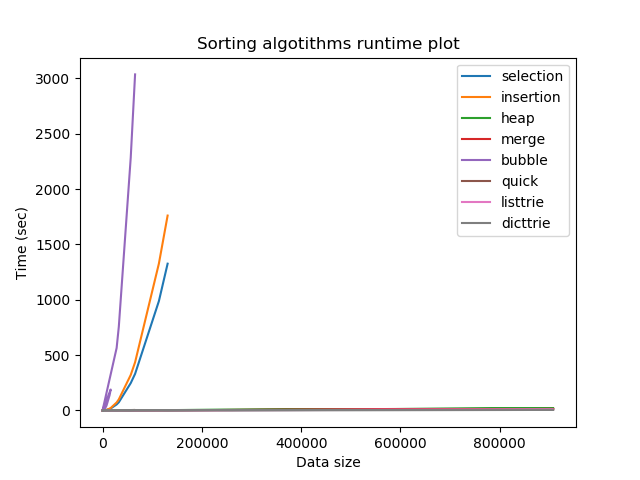

<IPython.core.display.Javascript object>


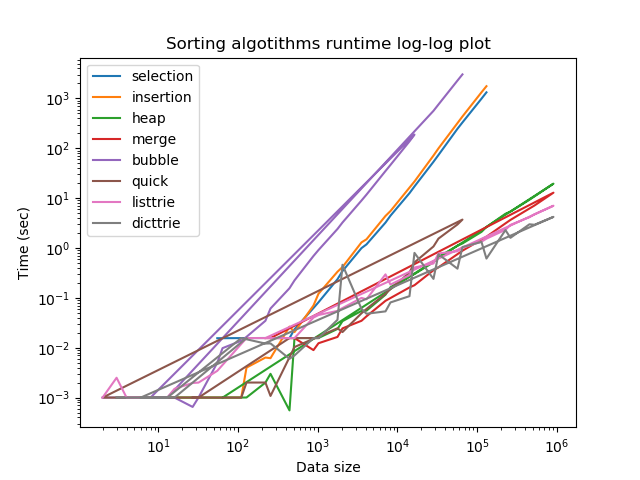

<function matplotlib.pyplot.show(*args, **kw)>

In [14]:
legend = []
fig1 = plt.figure(1)
plt.title('Sorting algotithms runtime plot')

for alg, xys in xys_dict.items():
    legend.append(alg)
    plt.plot(xys[0], xys[1])

plt.xlabel('Data size')
plt.ylabel('Time (sec)')
plt.legend(legend)

fig2 = plt.figure(2)
plt.title('Sorting algotithms runtime log-log plot')

for alg, xys in xys_dict.items():
    plt.loglog(xys[0], xys[1])

plt.xlabel('Data size')
plt.ylabel('Time (sec)')
plt.legend(legend)

plt.